# Data Analysis and Visualization of Hospitalized Patients due to SARS-COV2

### Libraries

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator, DateFormatter
import seaborn

### Import the data to work with

In [11]:
df_hospitalized = pd.read_csv("data/hospitalizadas.csv")
df_positive = pd.read_csv("data/casos_positivos.csv")

### Keep columns I'm interested for both of the data

In [13]:
df_hospitalized = pd.read_csv("hospitalizadas.csv")
df_hospitalized.head(20)
df_hospitalized.columns
df_hospitalized = df_hospitalized[['fecha', 'hospitalizados_totales_cdmx']]
df_hospitalized = df_hospitalized.rename(columns = {'fecha': 'date', 'hospitalizados_totales_cdmx': 'hospitalized'})
df_hospitalized['date'] = pd.to_datetime(df_hospitalized['date'], format = '%Y-%m-%d')
# Get rid of the first month of the pandemic (march)
df_hospitalized = df_hospitalized.loc[(df_hospitalized['date'] > '2020-03-31')]
df_hospitalized = df_hospitalized.set_index('date')
df_hospitalized.head()

,hospitalized
date,
2020-04-01,359
2020-04-02,361
2020-04-03,405
2020-04-04,434
2020-04-05,509


In [14]:
df_positive = pd.read_csv("casos_positivos.csv")
df_positive.head()
df_positive.columns
df_positive = df_positive[['fecha_toma_muestra', 'positivos_totales_cdmx']]
df_positive = df_positive.rename(columns = {'fecha_toma_muestra' : 'date', 'positivos_totales_cdmx' : 'positives'})
df_positive.head()
# Get rid of the first month of the pandemic (march)
df_positive['date'] = pd.to_datetime(df_positive['date'], format = '%Y-%m-%d')
df_positive = df_positive.loc[(df_positive['date'] > '2020-03-31')]
df_positive = df_positive.set_index('date')
df_positive.head()

,positives
date,
2020-04-01,1
2020-04-02,3
2020-04-03,4
2020-04-04,14
2020-04-05,493


In [15]:
### Merge the data

In [17]:
merged_df = pd.merge(df_hospitalized, df_positive, how = 'inner', left_index = True, right_index = True)
merged_df.head()

,hospitalized,positives
date,,
2020-04-01,359,1
2020-04-02,361,3
2020-04-03,405,4
2020-04-04,434,14
2020-04-05,509,493


### Graph the data

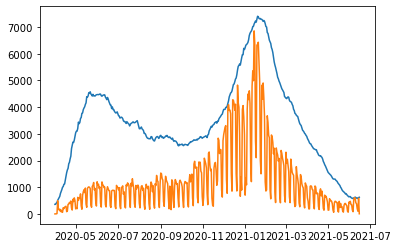

In [18]:
plt.figure()
plt.plot(merged_df.index, merged_df['hospitalized'])
plt.plot(merged_df['positives'])
plt.show()

No handles with labels found to put in legend.


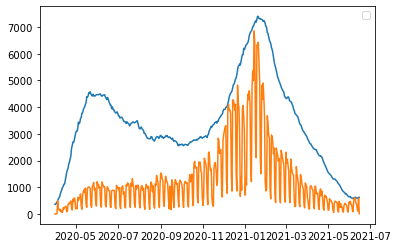

In [19]:
plt.figure()
plt.plot(merged_df['hospitalized'])
plt.plot(merged_df['positives'])
plt.legend()
plt.show()

No handles with labels found to put in legend.


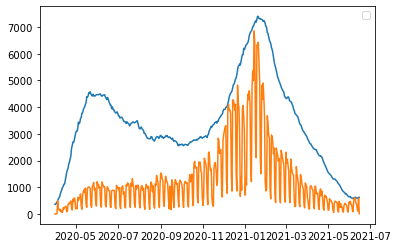

In [20]:
plt.figure()
plt.plot(merged_df['hospitalized'])
plt.plot(merged_df['positives'])
plt.legend() # add legend

plt.show()

In [24]:
# Get the highest value of a column in pandas
y_max = merged_df['hospitalized'].max()
x_max = merged_df['hospitalized'].idxmax()
print(x_max, y_max)

2021-01-19 00:00:00 7401


In [25]:
# Get the second highest value of a column in pandas (This in order to see both of the Covid Waves)
tillNovember_df = merged_df.reset_index()
tillNovember_df = tillNovember_df.loc[(tillNovember_df['date'] < '2020-11-01')]
tillNovember_df =  tillNovember_df.set_index('date')
tillNovember_df.head()
y_first_max = tillNovember_df['hospitalized'].max()
x_first_max = tillNovember_df['hospitalized'].idxmax()
x_max = tillNovember_df[]
print(x_first_max, y_first_max)



SyntaxError: invalid syntax (<ipython-input-25-17b1bd993051>, line 8)

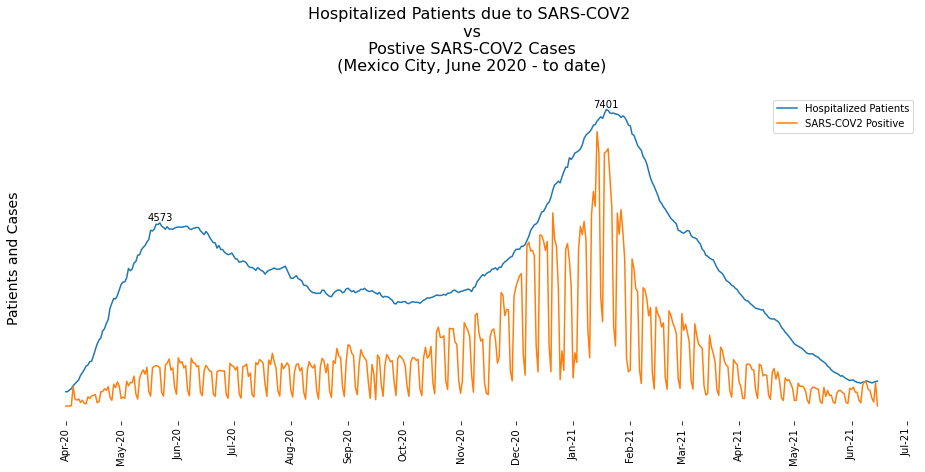

In [26]:
fig, ax = plt.subplots(figsize = (16, 6))
# Create both plots
ax.plot(merged_df.index, merged_df['hospitalized'])
ax.plot(merged_df.index, merged_df['positives'])
ax.legend(['Hospitalized Patients', 'SARS-COV2 Positive'])# add legend
# Set title and labels for axes
ax.set_title("Hospitalized Patients due to SARS-COV2 \n vs \n Postive SARS-COV2 Cases \n (Mexico City, June 2020 - to date) \n",
             fontsize = 16)

ax.set_ylabel('Patients and Cases', fontsize = 14)
ax.xaxis.set_major_locator(MonthLocator())
date_form = DateFormatter('%b-%y')
ax.xaxis.set_major_formatter(date_form)
plt.xticks(rotation = 90)
plt.box(on = None)
seaborn.despine(left = True, bottom = True, right = True)

ax.text(x_max, y_max+50, "%d"%y_max, ha = 'center')
ax.text(x_first_max, y_first_max+50, "%d"%y_first_max, ha = 'center')
ax.set_yticks([])
plt.show()